In [1]:
from lensid.utils.ml_utils import *

2021-09-02 21:21:36.234697: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 21:21:36.234742: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#df_dir='../../data/dataframes/train/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/train/' ##CIT

# train XGB sky

In [3]:
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[:2400]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_half_sky.csv' ,index_col=[0])
df_unlensed_sky_half = df_unlensed_sky_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_train_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)
df_train_sky=df_train_sky.sample(frac = 1).reset_index(drop = True)

In [4]:
df_train_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq
128146,178,242,0,0.254723,0.002054,0.075581,0.117075
128147,205,253,0,0.615855,0.004966,0.282020,0.126113
128148,46,329,0,0.221660,0.001787,0.019983,0.118367
128149,6,371,0,0.006091,0.000049,0.001524,0.573157
128150,145,494,0,0.379589,0.003061,0.046414,0.228739


In [5]:
xgboost_sky_model=train_xgboost_sky(df_train_sky)

In [6]:
if not os.path.exists('out'):
        os.makedirs('out')

In [7]:
joblib_file = "out/XGBsky_0.pkl"  
joblib.dump(xgboost_sky_model, joblib_file)

['out/XGBsky_0.pkl']

# validate XGB sky

In [8]:
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[2400:]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_second_half_sky.csv' ,index_col=[0])
df_unlensed_sky_half = df_unlensed_sky_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_val_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)
df_val_sky=df_val_sky.sample(frac = 1).reset_index(drop = True)

In [9]:
df_val_sky=XGB_predict(df_val_sky,xgboost_sky_model)

In [10]:
df_val_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,xgb_pred_bayestar_skymaps
126143,837,926,0,0.491426,3.962311e-03,8.320887e-02,0.127424,0.000011
126144,594,818,0,0.000001,9.745500e-09,6.212426e-07,0.154214,0.000004
126145,713,1001,0,0.077946,6.284671e-04,1.418421e-02,0.152263,0.000004
126146,656,725,0,0.228776,1.844592e-03,3.109589e-02,0.142671,0.000005
126147,849,875,0,1.622770,1.308421e-02,2.025356e-01,0.150548,0.000196


bayestar_skymaps_blu auc = 0.9651
bayestar_skymaps_d2 auc = 0.9651
bayestar_skymaps_d3 auc = 0.9012
bayestar_skymaps_lsq auc = 0.2307
xgb_pred_bayestar_skymaps auc = 0.9796


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


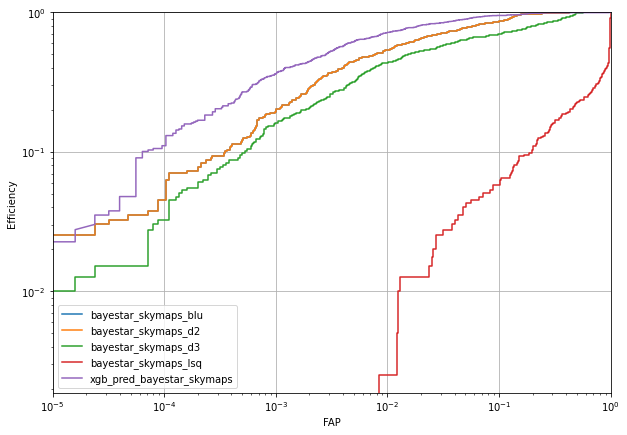

In [11]:
fig=plot_ROCs(df_val_sky,logy=True,cols=['bayestar_skymaps_blu','bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'xgb_pred_bayestar_skymaps'])

# cross-validate XGB sky

In [12]:
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )[:2400]
df_unlensed_sky_half = pd.read_csv(df_dir+'unlensed_half_sky.csv' ,index_col=[0])
#df_unlensed_sky_second_half = pd.read_csv(df_dir+'unlensed_second_half_sky.csv' ,index_col=[0])
#df_cv_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half,df_unlensed_sky_second_half],ignore_index = True)
df_cv_sky = pd.concat([df_lensed_sky,df_unlensed_sky_half],ignore_index = True)

df_cv_sky=df_cv_sky.sample(frac = 1).reset_index(drop = True)

In [13]:
df_cv_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq
128146,85,91,0,8.258113e-10,6.658420e-12,9.552617e-10,0.123901
128147,31,60,0,7.636004e-05,6.156821e-07,1.795673e-05,0.110907
128148,247,351,0,5.306583e-01,4.278636e-03,2.362767e-01,0.133089
128149,97,251,0,6.346685e-04,5.117258e-06,2.512558e-04,0.141524
128150,4,396,0,3.252096e-04,2.622127e-06,2.620402e-05,0.141064


In [14]:
cv = StratifiedKFold(n_splits = 10)


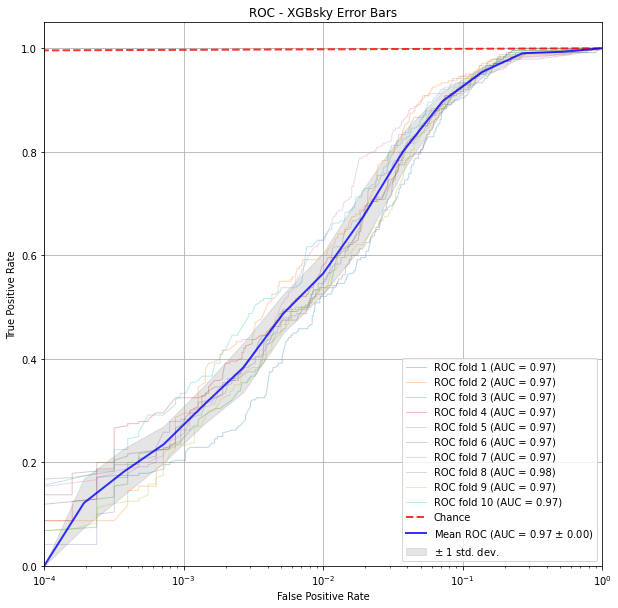

In [15]:
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-4,0,15)
fig,ax = plt.subplots()
cols=['bayestar_skymaps_blu','bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq']
for i,(train_index, test_index) in enumerate(cv.split(df_cv_sky,df_cv_sky.Lensing.values)):
    xgboost_sky_model=train_xgboost_sky(df_cv_sky.iloc[train_index])
    joblib_file = "out/XGBsky_"+str(i+1)+".pkl"  
    joblib.dump(xgboost_sky_model, joblib_file)
    X=np.c_[df_cv_sky.iloc[test_index][cols]]
    viz = plot_roc_curve(xgboost_sky_model,X,df_cv_sky.Lensing.values[test_index],name="ROC fold {}".format(i+1),alpha=0.3,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr,viz.fpr,viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
        
ax.plot([0,1],[0,1],linestyle="--",lw = 2,color="r",label="Chance",alpha=0.8)
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b',label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.2,label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[1e-4,1],ylim=[0,1.05],
          title = "ROC - XGBsky Error Bars",xscale='log')
ax.legend(loc ="lower right")
#plt.savefig('ROC-XGB_sky.png')
plt.grid()
plt.show()